<a href="https://colab.research.google.com/github/alibagheribardi/Erdos_Project/blob/main/Graph_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Data to Graph: Building Models

Any dataset $\mathcal{D}$ can be conceptualized as a rectangular matrix comprising either numerical or categorical entries. In this matrix, the rows denote individual case studies, whereas the columns represent the features or variables associated with each case.


Any consideration of similarity between individual case studies establishes a connection among them, which naturally corresponds to a (weighted) directed or undirected graph model associated with the dataset.

$$\large\text{ dataset + similarity  ⇒  graph  model }$$



**Example 1**: Social Network

A dataset containing user profiles on a social media platform, including features such as interests, location, and friends.

Similarity Consideration: Users with similar interests (e.g., both liking "hiking" and "photography") are considered similar.

Graph Model: Each user is represented as a node, and an edge is drawn between two users if they share similar interests. The weight of the edge could represent the number of shared interests.


**Example 2**: Product Recommendation System
Dataset

 A dataset of customer purchases, including features such as product categories, purchase frequency, and ratings.

Similarity Consideration: Products that are frequently purchased together or have similar ratings by customers are considered similar.

Graph Model: Each product is represented as a node, and an edge is drawn between two products if they are often purchased together. The weight of the edge could represent the frequency of co-purchases.

**Example 3**: Disease Similarity in Healthcare
Dataset

 A dataset of patient records, including features such as symptoms, diagnoses, and treatments.

Similarity Consideration: Patients with similar symptoms or diagnoses are considered similar.

Graph Model: Each patient is represented as a node, and an edge is drawn between two patients if they share similar symptoms. The weight of the edge could represent the number of shared symptoms.


##Key Point:
Identifying an appropriate measure of similarity within the dataset, which is heavily influenced by the inherent characteristics of the data, significantly impacts all subsequent processes. This initial step fundamentally shapes the analysis and interpretation of the resulting graph.

# Remark.  
The model graph of the dataset provides helpful information about the situations of nodes through various centrality measures, such as Degree Centrality, Betweenness Centrality, Closeness Centrality, and Clustering Coefficient. Leveraging this information, one may assign an appropriate identifier (ID) to the dataset.



## Modifying PageRank: Techniques and Applications

When the chosen similarity measure results in an undirected graph model associated with the dataset, a straightforward approach to modify the PageRank of the nodes involves purposeful perturbations of the existing links between nodes. The following outlines the process.

Let $A$ be a symmetric adjacency matrix associated with an undirected graph model. The eigenvalue decomposition of $A$ can be expressed as

$$
A = V D V^T,
$$

where the columns of $V$ represent the eigenvectors of $A$, and the diagonal matrix $D$ contains the eigenvalues, which are typically distinct in real-world datasets. Let $\lambda_{\text{max}}$ denote the dominant eigenvalue, and let $v_{\text{max}}$ be the corresponding eigenvector, which is found in one of the columns of $V$. The arrangement of the components of $v_{\text{max}}$ reflects the PageRanks of the nodes within the graph.

To elucidate this relationship, consider the constant vector $1$. We can analyze the behavior of the matrix power $A^n$ applied to this vector:


\begin{align*}
1 = \sum \alpha_k v_k ⇒ A^n 1 &= \sum \alpha_k A^n v_k
\\& = \sum \alpha_k \lambda_k^n v_k
\\& = \lambda_{\text{max}}^n \left( \alpha_{\text{max}}v_{\text{max}} + \sum \left( \frac{\lambda_k}{\lambda_{\text{max}}} \right)^n \alpha_kv_k \right) \to \lambda_{\text{max}}^n \alpha_{\text{max}}v_{\text{max}}.
\end{align*}



This expression indicates that, as $n$ approaches infinity, the rate of change of the vector $A^n 1$ converges to the direction of $\langle 1 , v_{\text{max}}\rangle v_{\text{max}}$. Consequently, this convergence implies that the PageRanks of the nodes are predominantly influenced by the dominant eigenvector associated with the largest eigenvalue.


## Purposeful Perturbations

By leveraging the Lagrange interpolation polynomial, one can construct a polynomial $h$ that modifies the eigenvalues of the matrix such that any desired eigenvalue becomes dominant. This can be expressed as follows:

\begin{align*}
h(A) &= V \cdot h(D) \cdot V^T \\
      &= V \cdot \text{diag}(h(\lambda_1), \ldots, h(\lambda_n)) \cdot V^T,
\end{align*}

where $h(D)$ is the diagonal matrix formed by applying the polynomial $h$ to each eigenvalue $\lambda_i$ of the matrix $A$.  




# Some Potential Applications:

- Changing the pageranks:
 In a dataset comprising $n$ case studies, each member of the eigenbasis of the associated adjacency matrix outlines a clear roadmap for modifications of the PageRanks. This includes the addition of targeted new edges aimed at achieving the desired changes in the initial PageRanks of the nodes.

- Monitoring and controling the clusters:

    1- The leading eigenvalues of the modularity  matrix are used to identify communities. Positive eigenvalues correspond to possible divisions of the graph into clusters.

    2- The second smallest eigenvalue of the Laplacian matrix, known as the Fiedler value, provides insights into the graph's connectivity. A larger Fiedler value suggests a more connected graph, while a value close to zero indicates that the graph is nearly disconnected.




## Example I:   New Guinea Highlands tribes (1954)

A network of friendships among tribes of Gahuku-Gama alliance structure of the Eastern Central Highlands region in New Guinea. Edge sign indicates either friendship ("rova") or enmity ("hint”).

https://networks.skewed.de/net/new_guinea_tribes




<img src="https://networks.skewed.de/draw/new_guinea_tribes" alt="CS Department" width="500">



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Load edges from a CSV file
edges = pd.read_csv("edges.csv", header=None, skiprows=1)

# Create the adjacency matrix
source = edges[0].astype(int).values
target = edges[1].astype(int).values
N = max(source.max(), target.max()) + 1
Adj = np.zeros((N, N))

# Fill the adjacency matrix
for s, t in zip(source, target):
    Adj[s, t] = 1
    #Adj[t, s] = 1  # Assuming an undirected graph



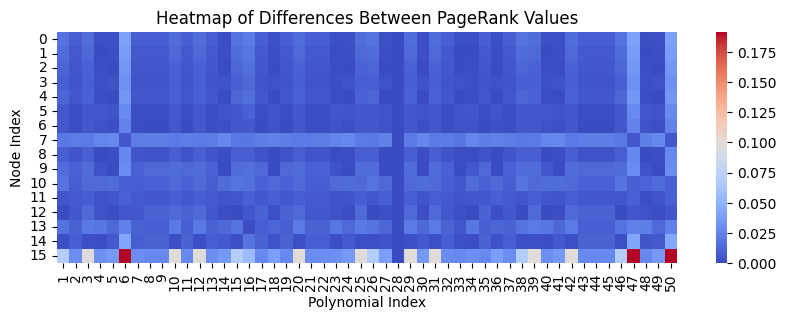

In [ ]:
def polynomial_h(A, coefficients):
    """Compute h(A) where h is a polynomial with binary coefficients."""
    A = A.astype(int)  # Ensure A is an integer matrix
    H = np.zeros_like(A, dtype=int)

    for i, coeff in enumerate(coefficients):
        if coeff == 1:
            H += np.linalg.matrix_power(A, i + 1)  # Now both H and A are integers

    H = (H > 0).astype(int)  # Convert to binary adjacency matrix
    return H

# Generate 100 different polynomials with random binary coefficients
num_polynomials = 50
poly_coeffs_list = [np.random.randint(0, 2, size=5).tolist() for _ in range(num_polynomials)]

# Step 3: Compute PageRanks
pagerank_matrix = np.zeros((N, num_polynomials + 1))

# Compute PageRank for the original A
graph_A = nx.DiGraph(Adj)
pagerank_A = np.array(list(nx.pagerank(graph_A).values()))
pagerank_matrix[:, 0] = pagerank_A  # First column is PageRank of A

# Compute PageRanks for h(A)
for j, coeffs in enumerate(poly_coeffs_list):
    H = polynomial_h(Adj, coeffs)
    G = nx.DiGraph(H)  # Create directed graph
    pr = np.array(list(nx.pagerank(G).values()))
    pagerank_matrix[:, j + 1] = pr

# Step 4: Compute the differences between corresponding columns
diff_matrix = np.abs(pagerank_matrix[:, 1:] - pagerank_matrix[:, 0].reshape(-1, 1))

# Step 5: Create the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(diff_matrix, cmap='coolwarm', annot=False, xticklabels=range(1, num_polynomials + 1), yticklabels=range(N))
plt.title('Heatmap of Differences Between PageRank Values')
plt.xlabel('Polynomial Index')
plt.ylabel('Node Index')
plt.show()


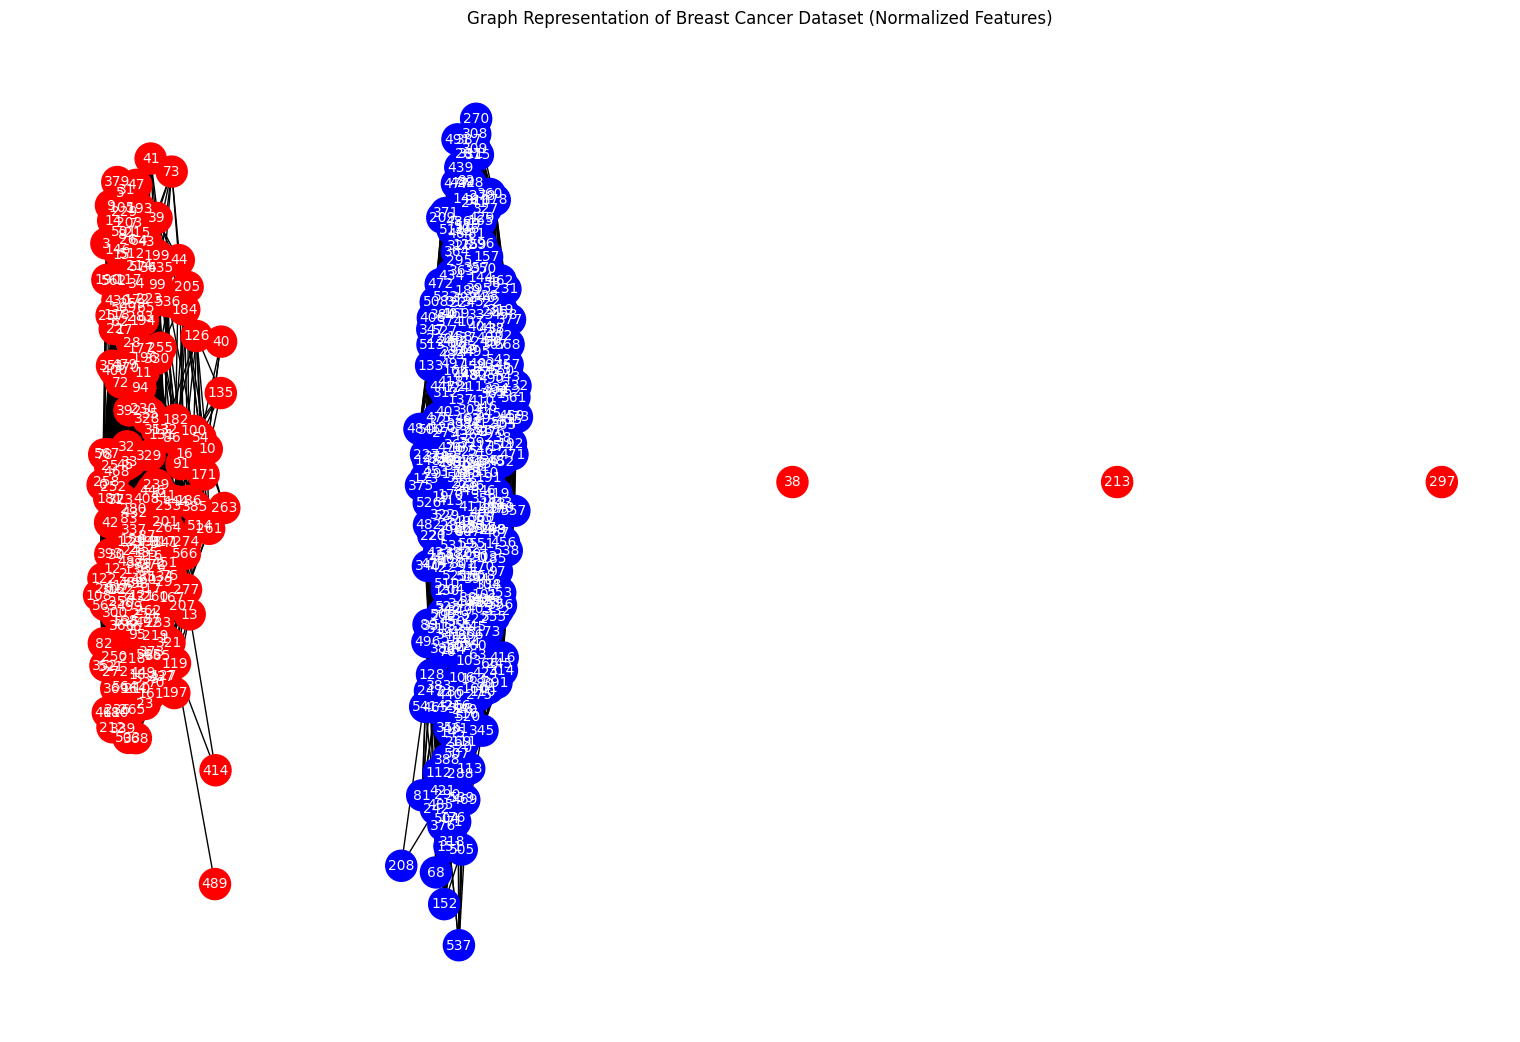

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Set seed for reproducibility
np.random.seed(42)

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data  # Features (30 features)
y = data.target  # Labels (0: benign, 1: malignant)

# Create DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['Class'] = y

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create new DataFrame with normalized features
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['Class'] = y  # Add labels back

# Number of samples
n_samples = len(df_normalized)

# Compute Euclidean distance matrix (using normalized features)
distances = euclidean_distances(df_normalized.drop('Class', axis=1))

# Create graph
G = nx.Graph()

# Add nodes (samples) to the graph
for i in range(n_samples):
    G.add_node(i, label=df_normalized.iloc[i]['Class'])

# Define the range for k
k_min = 3
k_max = int(round(sqrt(n_samples)))  # Nearest natural number to sqrt(n_samples)

# Check condition and add edges
for i in range(n_samples):
    # Compute distances and sort indices
    sorted_indices = np.argsort(distances[i])

    # Select nearest neighbors (excluding the sample itself)
    nearest_neighbors = sorted_indices[1:k_max + 1]  # Start from 1 because the sample itself has distance 0

    # Check 75% same-label condition for k from k_min to k_max
    for k in range(k_min, k_max + 1):
        nearest_k = sorted_indices[1:k + 1]  # k nearest neighbors
        nearest_labels = df_normalized.iloc[nearest_k]['Class']

        # Check if at least 75% of the k nearest neighbors have the same label
        if np.sum(nearest_labels == df_normalized.iloc[i]['Class']) / k >= 0.75:
            # If condition is met, add edges to all same-label nodes in nearest_neighbors
            for j in nearest_neighbors:
                if df_normalized.iloc[j]['Class'] == df_normalized.iloc[i]['Class']:
                    G.add_edge(i, j)
            break  # If the condition is met for any k, stop checking further k values

# Find connected components
connected_components = list(nx.connected_components(G))

# Create a layout for the entire graph with spacing between components
pos = {}
x_offset = 0  # To shift each component horizontally
y_offset = 0  # To shift each component vertically

for component in connected_components:
    # Create a subgraph for the current component
    subgraph = G.subgraph(component)

    # Compute positions for the current component
    subgraph_pos = nx.spring_layout(subgraph)

    # Shift positions to avoid overlap with other components
    for node, (x, y) in subgraph_pos.items():
        pos[node] = (x + x_offset, y + y_offset)

    # Update offsets for the next component
    x_offset += 4  # Increase horizontal spacing
    y_offset += 0  # Increase vertical spacing (optional)

# Draw the graph with spacing between components
plt.figure(figsize=(15, 10))
labels = nx.get_node_attributes(G, 'label')

# Color nodes based on their class
node_colors = ['red' if labels[node] == 0 else 'blue' for node in G.nodes()]

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='white')

# Add title
plt.title('Graph Representation of Breast Cancer Dataset (Normalized Features)')
plt.show()

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def process_data(df, threshold=0.75):
    """
    Process the given DataFrame to generate:
    - A sorted DataFrame
    - A label-based adjacency matrix
    - A similarity matrix

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing features and 'target' column.
    - threshold (float): The minimum cumulative similarity for adjacency matrix construction.

    Returns:
    - df (pd.DataFrame): Sorted DataFrame.
    - main_adj_matrix (np.ndarray): Adjacency matrix based on label similarity.
    - modified_label_matrix (np.ndarray): Label similarity matrix.
    """
    # Ensure the DataFrame contains a 'target' column
    if 'target' not in df.columns:
        raise ValueError("Input DataFrame must contain a 'target' column.")

    # Sort by target
    df_sorted = df.sort_values(by='target').reset_index(drop=True)
    df = df_sorted  # Update DataFrame

    # Extract feature values and target values
    X = df.drop(columns=['target']).values  # Features
    Y = df['target'].values  # Targets

    # Initialize matrices
    n = len(X)
    main_adj_matrix = np.zeros((n, n), dtype=int)

    # Create label similarity matrix
    label_matrix = Y[:, np.newaxis].repeat(n, axis=1)
    modified_label_matrix = (label_matrix == Y).astype(int)  # Ensure label comparison

    # Compute distance matrix and sort neighbors
    nearest_nbhd = np.argsort(distance_matrix(X, X), axis=1)

    # Construct adjacency matrix based on label similarity threshold
    for j, neighbors in enumerate(nearest_nbhd):
        cumsum_values = np.cumsum(modified_label_matrix[j, neighbors]) / np.arange(1, len(neighbors) + 1)
        valid_k_indices = np.where(cumsum_values >= threshold)[0]

        if valid_k_indices.size > 0:
            last_k = valid_k_indices[-1]
            sample_row = np.zeros(n, dtype=int)
            sample_row[neighbors[:last_k + 1]] = 1
            main_adj_matrix[j] = sample_row * modified_label_matrix[j]
        else:
            main_adj_matrix[j, :] = 0

    # Compute rank of the adjacency matrix
    rank_main_adj_matrix = np.linalg.matrix_rank(main_adj_matrix)
    print(f"Rank of the main_adj_matrix: {rank_main_adj_matrix}, Shape: {main_adj_matrix.shape}")

    # Remove self-loops (diagonal elements)
    np.fill_diagonal(main_adj_matrix, 0)

    # Check symmetry
    print('Symmetry of main_adj_matrix:', np.array_equal(main_adj_matrix, main_adj_matrix.T))

    return df, main_adj_matrix, modified_label_matrix



Rank of the main_adj_matrix: 58, Shape: (150, 150)
Symmetry of main_adj_matrix: False


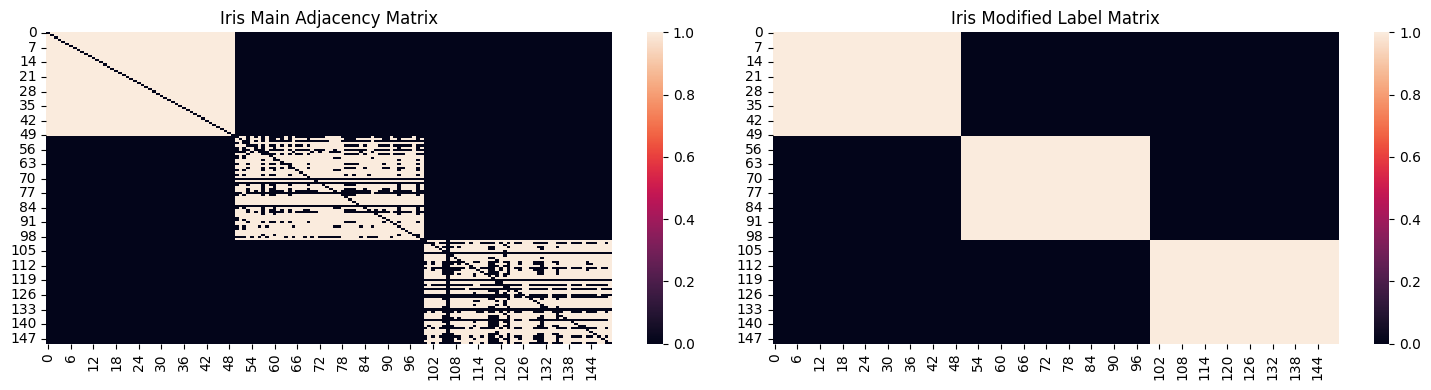

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Add target column

df, main_adj_matrix, modified_label_matrix = process_data(df)

# Plot adjacency matrices
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.heatmap(main_adj_matrix, cbar=True, ax=ax[0])
ax[0].set_title("Iris Main Adjacency Matrix")

sns.heatmap(modified_label_matrix, cbar=True, ax=ax[1])
ax[1].set_title("Iris Modified Label Matrix")

plt.tight_layout()
plt.show()


Rank of the main_adj_matrix: 157, Shape: (569, 569)
Symmetry of main_adj_matrix: False


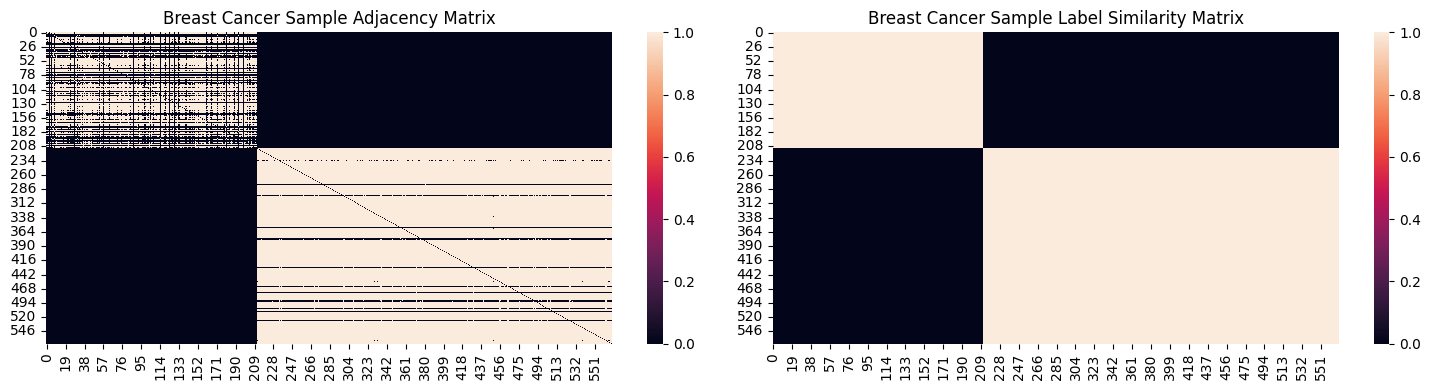

In [29]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage with Breast Cancer dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target  # Add target column

df, main_adj_matrix, modified_label_matrix = process_data(df)

# Plot adjacency matrices
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.heatmap(main_adj_matrix, cbar=True, ax=ax[0])
ax[0].set_title("Breast Cancer Sample Adjacency Matrix")

sns.heatmap(modified_label_matrix, cbar=True, ax=ax[1])
ax[1].set_title("Breast Cancer Sample Label Similarity Matrix")

plt.tight_layout()
plt.show()
